In [2]:
import math
from dataclasses import dataclass

@dataclass
class Point:
    x: float
    y: float
    
    def angle_with(self, other_point):
        """
        Calculate the angle between two points.

        Parameters:
            other_point (Point): The other point to calculate the angle with.

        Returns:
            float: The angle in radians.
        """
        dx = other_point.x - self.x
        dy = other_point.y - self.y
        return math.atan2(dy, dx)

# Example usage:
point1 = Point(0, 0)
point2 = Point(0, -1)
angle = point1.angle_with(point2)
print("Angle between point1 and point2:", angle)

Angle between point1 and point2: -1.5707963267948966


In [3]:
from test_data_generator import generate_fake_metro, plot_metro_layout


flow_paths, stations, df = generate_fake_metro(
    station_count=10,
    flow_path_count=10,
    max_flow_path_length=5,
    min_flow_path_frequency=1,
    max_flow_path_frequency=10
)

In [4]:
flow_paths

[(4, ['Root', 'A', 'H', 'F', 'E', 'D']),
 (4, ['Root', 'A']),
 (3, ['Root', 'C', 'I', 'E']),
 (9, ['Root', 'A']),
 (1, ['Root', 'C', 'I', 'E']),
 (4, ['Root', 'A', 'H']),
 (7, ['Root', 'A', 'H']),
 (9, ['Root', 'A']),
 (10, ['Root', 'A']),
 (3, ['Root', 'C', 'I'])]

<module 'matplotlib.pyplot' from 'c:\\Users\\lucsc\\anaconda3\\envs\\main\\Lib\\site-packages\\matplotlib\\pyplot.py'>

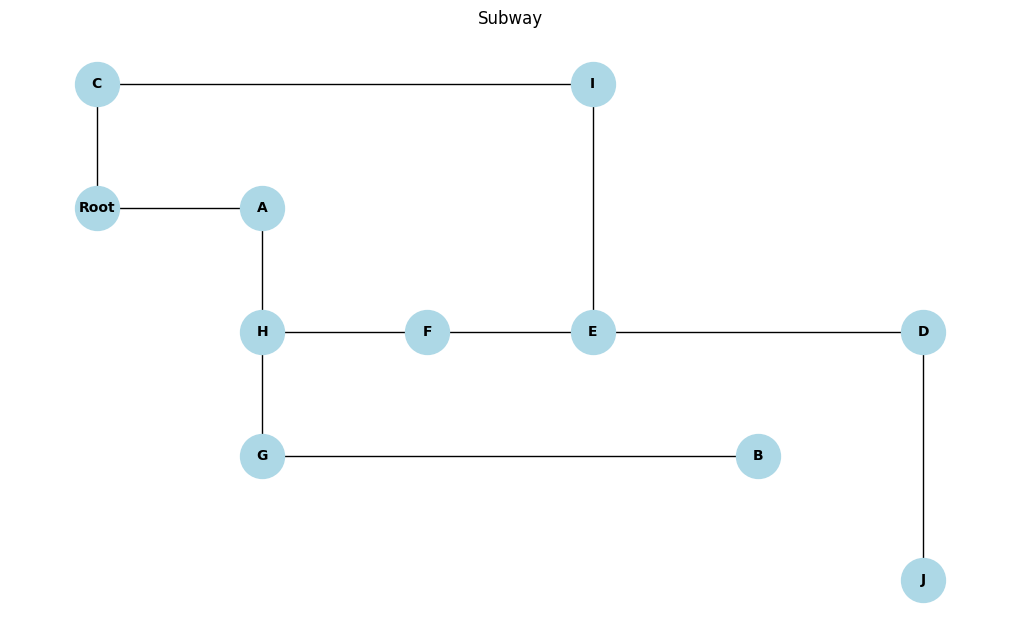

In [5]:
from test_data_generator import plot_metro_layout

plot_metro_layout(df)

In [52]:
import importlib
import algo
importlib.reload(algo)

from algo import DummyAlgorithm, DirectionalAlg
from utils import LayoutAlgorithm, FlowPathsT, Point, LayoutOutput

algorithms: [LayoutAlgorithm] = [
    DummyAlgorithm(),
    DirectionalAlg()
]

algorithms[1].find_optimal_layout(flow_paths=flow_paths, stations=stations)

Angle 3.141592653589793 for key RootAG is between 0.5*pi and pi
Angle 3.141592653589793 for key RootA is between 0.5*pi and pi
Angle -2.498091544796509 for key RootAGHB is between -0.5*pi and -pi
Angle -2.601173153319209 for key RootAGH is between -0.5*pi and -pi
Angle -2.896613990462929 for key RootAGHBI is between -0.5*pi and -pi


[[('Root', 'S3'), ('A', 'S3'), ('G', 'S3')],
 [('Root', 'S4'), ('A', 'S4')],
 [('Root', 'S0'), ('A', 'S0'), ('G', 'S0'), ('H', 'S0'), ('B', 'S0')],
 [('Root', 'S1'), ('A', 'S1'), ('G', 'S1'), ('H', 'S1')],
 [('Root', 'S2'),
  ('A', 'S2'),
  ('G', 'S2'),
  ('H', 'S2'),
  ('B', 'S2'),
  ('I', 'S2')]]

In [23]:
data = {'S0': (0, 0), 'S1': (1, 1), 'S2': (1, -1), 'S3': (-1, 1), 'S4': (-1, -1), 'S5': (2, 2)}


max_y_pair_pos_x = max(data.items(), key=lambda item: item[1][1] if item[1][0] > 0 else float("-inf"))
min_y_pair_pos_x = min(data.items(), key=lambda item: item[1][1] if item[1][0] > 0 else float("-inf"))
value = data.pop(max_y_pair_pos_x[0], None)
value

(2, 2)

In [24]:
data = {'S0': (0, 0), 'S1': (1, 1), 'S2': (1, -1), 'S3': (-1, 1), 'S4': (-1, -1), 'S5': (2, 2)}

max_y_key_pos_x = max((key for key, value in data.items() if value[0] > 0), key=lambda key: data[key][1], default=None)
min_y_key_pos_x = min((key for key, value in data.items() if value[0] > 0), key=lambda key: data[key][1], default=None)

value_max = data.pop(max_y_key_pos_x, None)
value_min = data.pop(min_y_key_pos_x, None)

print("Max value key:", max_y_key_pos_x)
print("Min value key:", min_y_key_pos_x)

print("Max value:", value_max)
print("Min value:", value_min)

Max value key: S5
Min value key: S2
Max value: (2, 2)
Min value: (1, -1)


In [ ]:
data

{'S0': (0, 0), 'S2': (1, -1), 'S3': (-1, 1), 's11': (-1, 10)}

In [35]:
original_dict = {
    "RootCI": "S5",
    "RootA": "S1",
    "RootAHFED": "S0",
    "RootCIE": "S3",
    "RootAH": "S4"
}
import re

list_of_dict = []

for key, value in original_dict.items():
    split_key =re.findall('[A-Z][^A-Z]*', key)
    new_dict = {}

    for i in split_key:
        new_dict[i] = value
    list_of_dict.append(new_dict)
print(list_of_dict)


[{'Root': 'S5', 'C': 'S5', 'I': 'S5'}, {'Root': 'S1', 'A': 'S1'}, {'Root': 'S0', 'A': 'S0', 'H': 'S0', 'F': 'S0', 'E': 'S0', 'D': 'S0'}, {'Root': 'S3', 'C': 'S3', 'I': 'S3', 'E': 'S3'}, {'Root': 'S4', 'A': 'S4', 'H': 'S4'}]


In [38]:
from test_data_generator import generate_fake_metro, plot_metro_layout
import random
import pandas as pd

flow_paths, stations, df = generate_fake_metro(
    station_count=10,
    flow_path_count=10,
    max_flow_path_length=5,
    min_flow_path_frequency=1,
    max_flow_path_frequency=10
)

test_stations = stations
test_paths = flow_paths

def generate_slots(test_paths):
    """
    Generates slots given the paths
    """
    max_length = int(len(test_paths) / 2) + 1
    list_of_list = [[(i,i), (i, -i), (-i, i), (-i, -i)] for i in range (1, max_length)]

    flattened_list = [(0, 0)]

    for sublist in list_of_list:
        for tuple_item in sublist:
            flattened_list.append(tuple_item)
    slot_names = ['s{}'.format(i) for i in range(0, len(flattened_list))]
    return list(zip(slot_names, flattened_list))

from algo import combination_to_coordinates, count_intersections
from utils import Point, LayoutAlgorithm, FlowPathsT, LayoutOutput, SLOTS
import numpy as np

def calculate_intersections(flow_paths, stations):
    """
    Takes a station, the flowpaths with frequencies and computes the optimal arrangement
    """

    slots = generate_slots(test_paths)

    data_paths = {
    'Paths': [n[1] for n in flow_paths],
    'Frequency': [n[0] for n in flow_paths],
    'Slot offsets': random.sample(slots, 10)
    }

    df_paths = pd.DataFrame(data_paths)

    # Transform offsets to a dictionary
    OFFSETS = df_paths['Slot offsets']
    offset_dict = dict()
    for offset in OFFSETS:
        offset_dict.update({offset[0]: offset[1]})

    # Get slot names
    slot_names = list(offset_dict.keys())

    SLOT_OFFSETS = offset_dict
    SLOTS = slot_names

    # Get slot names
    slot_coordinates = {}

    #Transforms the slot to a location
    for station_name, point in stations.items():
        for slot in SLOTS:
            offset_x, offset_y = SLOT_OFFSETS[slot]
            slot_coordinates[(station_name, slot)] = Point(point.x + offset_x, point.y + offset_y)

    combination_merged = []

    # For each path in the dataframe, it takes the slot offset and takes the name.
    # Then for each element of the path it creates a tuple with both.
    for path in df_paths.iterrows():
        path_list = []
        slot = path[1]['Slot offsets'][0]
        for station in path[1]['Paths']:
            path_list.append((station, slot))
        combination_merged.append(path_list)
    print(combination_merged)
    intersections = count_intersections(combination_to_coordinates(combination_merged, slot_coordinates))
    layout = list(map(lambda x: (1, x), combination_to_coordinates(combination_merged, slot_coordinates)))
    return intersections, combination_merged, layout

intersections_test , combination_merged , layout= calculate_intersections(test_paths, test_stations)
intersections_test



[[('Root', 's19'), ('A', 's19'), ('G', 's19')], [('Root', 's1'), ('A', 's1'), ('G', 's1'), ('H', 's1'), ('B', 's1')], [('Root', 's13'), ('A', 's13')], [('Root', 's18'), ('A', 's18')], [('Root', 's0'), ('A', 's0'), ('G', 's0')], [('Root', 's15'), ('A', 's15'), ('G', 's15'), ('H', 's15'), ('B', 's15'), ('I', 's15')], [('Root', 's20'), ('A', 's20'), ('G', 's20')], [('Root', 's12'), ('A', 's12'), ('G', 's12'), ('H', 's12')], [('Root', 's6'), ('A', 's6'), ('G', 's6')], [('Root', 's2'), ('A', 's2'), ('G', 's2'), ('H', 's2')]]


15

In [39]:
def convert_to_list_of_tuples(input_data):
    output_data = []
    for item in input_data:
        new_item = [(k, v) for k, v in item.items()]
        output_data.append(new_item)
    return output_data

# Example usage:
input_data = [{'Root': 'S5', 'C': 'S5', 'I': 'S5'}, {'Root': 'S1', 'A': 'S1'}, {'Root': 'S0', 'A': 'S0', 'H': 'S0', 'F': 'S0', 'E': 'S0', 'D': 'S0'}, {'Root': 'S3', 'C': 'S3', 'I': 'S3', 'E': 'S3'}, {'Root': 'S4', 'A': 'S4', 'H': 'S4'}]

output_data = convert_to_list_of_tuples(input_data)
print(output_data)


[[('Root', 'S5'), ('C', 'S5'), ('I', 'S5')], [('Root', 'S1'), ('A', 'S1')], [('Root', 'S0'), ('A', 'S0'), ('H', 'S0'), ('F', 'S0'), ('E', 'S0'), ('D', 'S0')], [('Root', 'S3'), ('C', 'S3'), ('I', 'S3'), ('E', 'S3')], [('Root', 'S4'), ('A', 'S4'), ('H', 'S4')]]


In [48]:
data =  [[('Root', 'S3'), ('A', 'S3'), ('G', 'S3')],
  [('Root', 'S4'), ('A', 'S4')],
  [('Root', 'S0'), ('A', 'S0'), ('G', 'S0'), ('H', 'S0'), ('B', 'S0')],
  [('Root', 'S1'), ('A', 'S1'), ('G', 'S1'), ('H', 'S1')],
  [('Root', 'S2'),
   ('A', 'S2'),
   ('G', 'S2'),
   ('H', 'S2'),
   ('B', 'S2'),
   ('I', 'S2')]]

list_of_points, list_of_paths = []
for path in data:
  for slot in path:
    list_of_points.append(slot_coordinates[slot])
  list_of_paths.append(list_of_points)
    

('Root', 'S3')
('A', 'S3')
('G', 'S3')
('Root', 'S4')
('A', 'S4')
('Root', 'S0')
('A', 'S0')
('G', 'S0')
('H', 'S0')
('B', 'S0')
('Root', 'S1')
('A', 'S1')
('G', 'S1')
('H', 'S1')
('Root', 'S2')
('A', 'S2')
('G', 'S2')
('H', 'S2')
('B', 'S2')
('I', 'S2')
